In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
sns.set(style="white")

In [39]:
df=pd.read_csv("D:\\sem 3\\DS\\tut_02\\tips (data for regression problem).csv")

In [40]:
df.sample(10)

,total_bill,tip,sex,smoker,day,time,size
236,12.60,1.0,Male,Yes,Sat,Dinner,2
203,16.40,2.5,Female,Yes,Thur,Lunch,2
163,13.81,2.0,Male,No,Sun,Dinner,2
159,16.49,2.0,Male,No,Sun,Dinner,4
137,14.15,2.0,Female,No,Thur,Lunch,2
127,14.52,2.0,Female,No,Thur,Lunch,2
118,12.43,1.8,Female,No,Thur,Lunch,2
234,15.53,3.0,Male,Yes,Sat,Dinner,2
46,22.23,5.0,Male,No,Sun,Dinner,2
81,16.66,3.4,Male,No,Thur,Lunch,2


In [41]:
df.shape

(244, 7)

In [42]:
df.info()
# so there is no null values in dat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [43]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


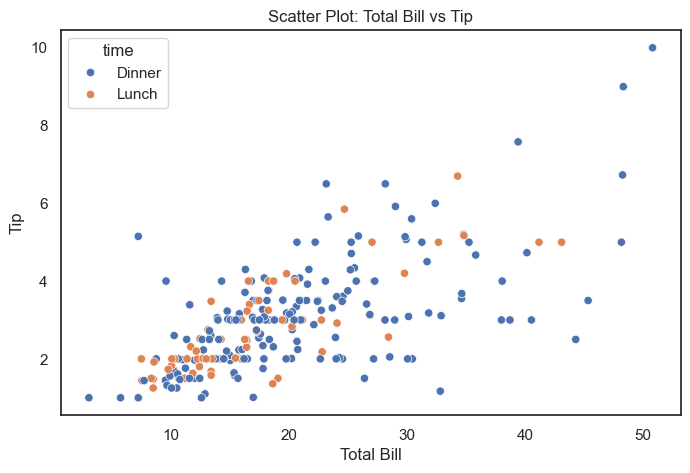

In [44]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="total_bill", y="tip", hue="time")
plt.title("Scatter Plot: Total Bill vs Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

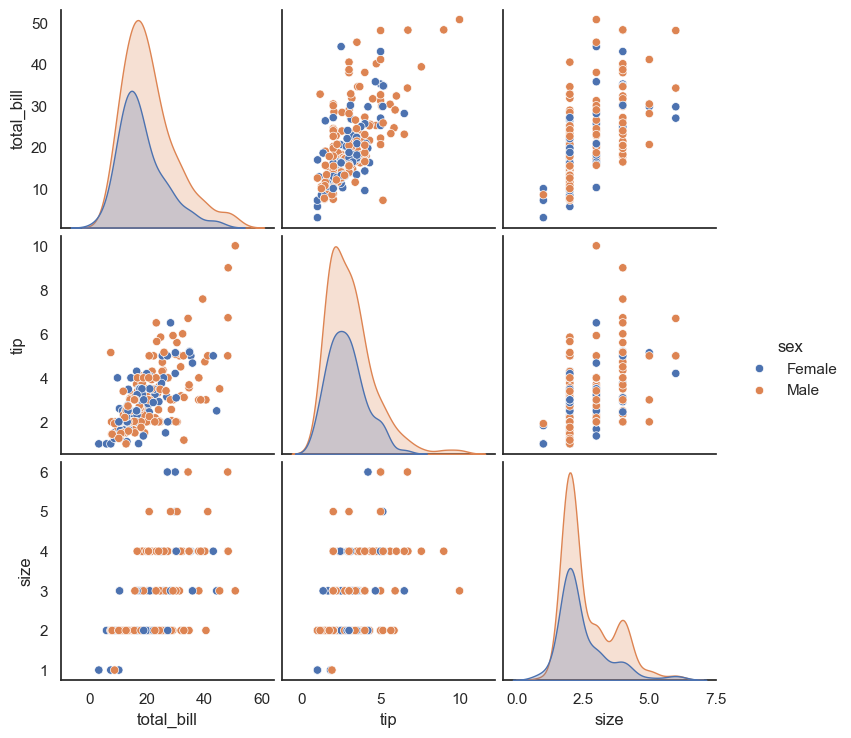

In [45]:
sns.pairplot(df,hue='sex')
# from graph it is clear that there is significant correlation between tip and total_bil

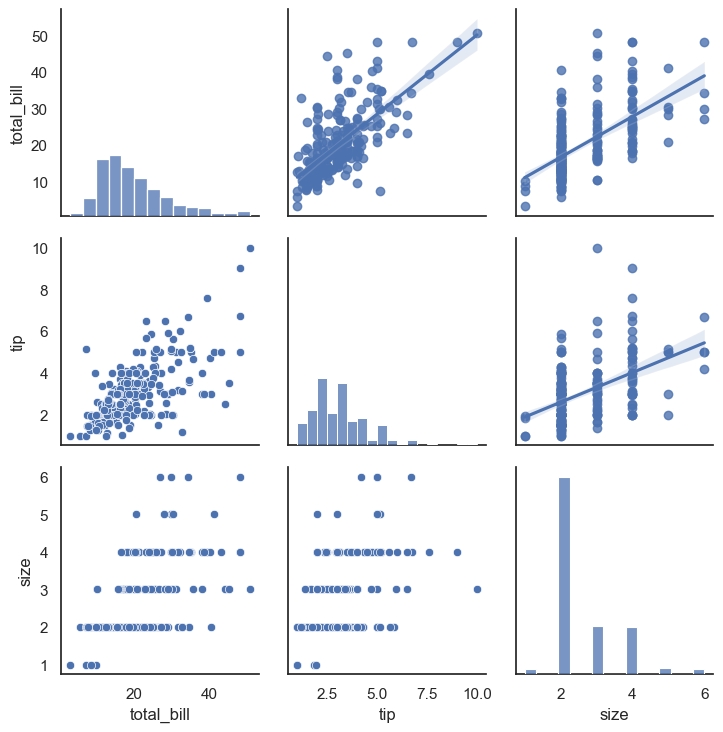

In [46]:
g = sns.PairGrid(data=df)
g.map_diag(sns.histplot)
g.map_upper(sns.regplot)
g.map_lower(sns.scatterplot)

In [49]:
corr_matrix = df[['total_bill', 'tip', 'size']].corr()
corr_matrix

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

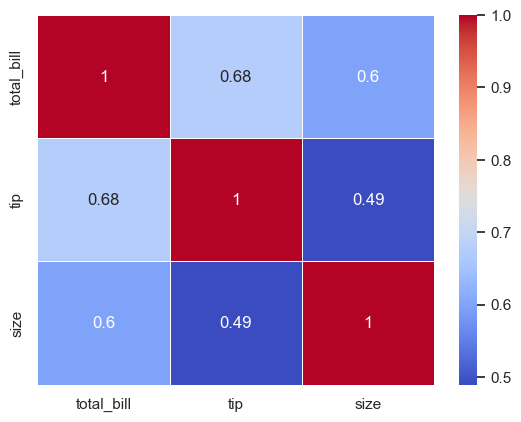

In [50]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

In [53]:
# Fit a simple linear regression model
model = ols("tip ~ total_bill", data=df).fit()
rainbow_stat, rainbow_p_value = linear_rainbow(model)

In [54]:
print("Rainbow Test Statistic:", rainbow_stat)
print("Rainbow Test p-value:", rainbow_p_value)

Rainbow Test Statistic: 1.2291480226129028
Rainbow Test p-value: 0.12911921525513964


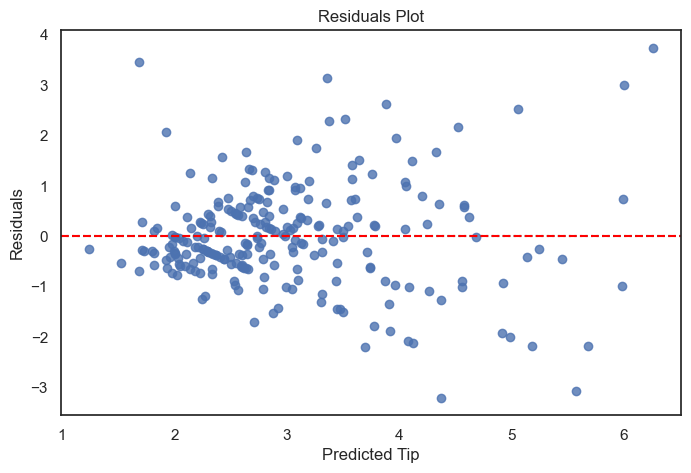

In [57]:
# Residuals Plot
predictions = model.predict(df["total_bill"])
residuals = df["tip"] - predictions

plt.figure(figsize=(8, 5))
sns.residplot(x=predictions, y=residuals)

plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals Plot")
plt.xlabel("Predicted Tip")
plt.ylabel("Residuals")
plt.show()

In [64]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [69]:
total_bill_mean=df.groupby('day')['total_bill'].mean()
tip_mean=df.groupby('day')['tip'].mean()

In [68]:
tip_mean

,tip
day,
Fri,2.734737
Sat,2.993103
Sun,3.255132
Thur,2.771452


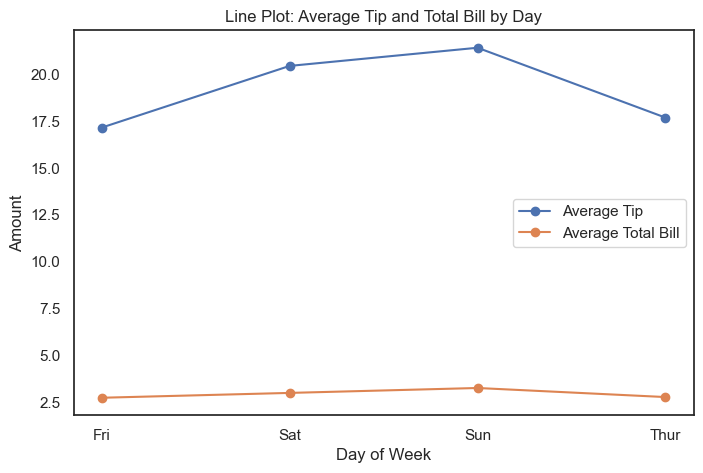

In [70]:
plt.figure(figsize=(8, 5))
plt.plot(total_bill_mean.index,total_bill_mean.values, marker="o", label="Average Tip")
plt.plot(tip_mean.index,tip_mean.values, marker="o", label="Average Total Bill")
plt.title("Line Plot: Average Tip and Total Bill by Day")
plt.xlabel("Day of Week")
plt.ylabel("Amount")
plt.legend()
plt.show()


In [77]:
# 7. Regression Analysis: Linear Regression Model
X = df[["total_bill"]]
y = df["tip"]

# Initialize and fit the model
reg = LinearRegression()
reg.fit(X, y)

# Predictions and evaluation
y_pred = reg.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print model evaluation metrics
print("R-squared (R2) Score:", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R2) Score: 0.45661658635167657
Mean Squared Error (MSE): 1.036019442011377


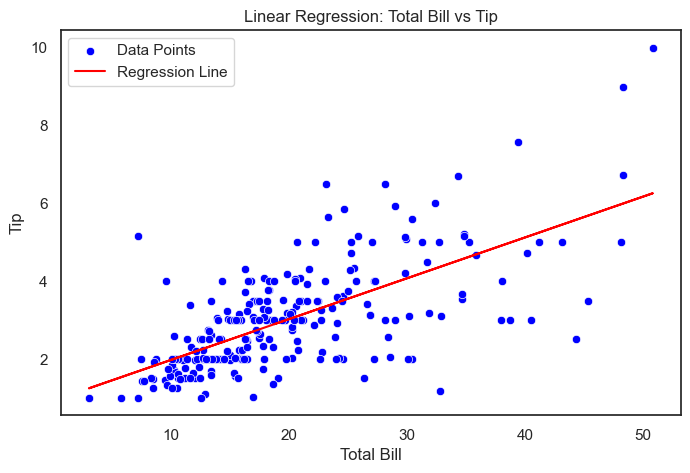

In [76]:

# Plotting the regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="total_bill", y="tip", color="blue", label="Data Points")
plt.plot(df["total_bill"], y_pred, color="red", label="Regression Line")
plt.title("Linear Regression: Total Bill vs Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.legend()
plt.show()

In [78]:
# Data Preprocessing: Encode categorical variables
data_encoded = pd.get_dummies(df, columns=["sex", "smoker", "day", "time"], drop_first=True)

In [98]:
data_encoded

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,True,False,True,False,False,False
240,27.18,2.00,2,False,True,True,False,False,False
241,22.67,2.00,2,True,True,True,False,False,False
242,17.82,1.75,2,True,False,True,False,False,False


In [122]:
# Define features (X) and target (y)
X = data_encoded.drop(columns=["tip"])
y = data_encoded["tip"]

In [123]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [149]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=21)

In [150]:
# linear regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}, Mean Squared Error: {mse}")


R-squared: 0.37219451378849155, Mean Squared Error: 0.7664179299922362


In [151]:
# ridge regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}, Mean Squared Error: {mse}")

R-squared: 0.3765978464786268, Mean Squared Error: 0.7610423905941884


In [152]:
# lasso regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}, Mean Squared Error: {mse}")

R-squared: 0.41683883959487644, Mean Squared Error: 0.7119166353684728


In [153]:
# decision tree
decision_tree= DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}, Mean Squared Error: {mse}")

R-squared: 0.13025457215243075, Mean Squared Error: 1.0617755102040816


In [154]:
# random forest
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}, Mean Squared Error: {mse}")

R-squared: 0.47039170377883677, Mean Squared Error: 0.6465398965306116


In [155]:
# Support Vector Regression
svr = SVR(kernel="rbf")
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}, Mean Squared Error: {mse}")

R-squared: 0.5264390185243653, Mean Squared Error: 0.5781179602902847


In [156]:
# k nearest neighbour(KNN)
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}, Mean Squared Error: {mse}")

R-squared: 0.2792250128942254, Mean Squared Error: 0.8799140589569161


In [161]:
# function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return model, mse, r2

models = [
    ("Linear Regression", linear_reg),
    ("Ridge Regression", ridge_reg),
    ("Lasso Regression", lasso_reg),
    ("Decision Tree", decision_tree),
    ("Random Forest", random_forest),
    ("Support Vector Regression (SVR)", svr),
    ("K-Nearest Neighbors (KNN)", knn)
]

results = []
for model_name, model in models:
    fitted_model, mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test, model_name)
    results.append([model_name, r2,mse])

In [162]:
results

[['Linear Regression', 0.37219451378849155, np.float64(0.7664179299922362)],
 ['Ridge Regression', 0.3765978464786268, np.float64(0.7610423905941884)],
 ['Lasso Regression', 0.41683883959487644, np.float64(0.7119166353684728)],
 ['Decision Tree', 0.1491968241426297, np.float64(1.0386510204081634)],
 ['Random Forest', 0.46809671713212164, np.float64(0.6493415906122443)],
 ['Support Vector Regression (SVR)',
  0.5264390185243653,
  np.float64(0.5781179602902847)],
 ['K-Nearest Neighbors (KNN)',
  0.2792250128942254,
  np.float64(0.8799140589569161)]]

,Model_name,R2,mse
0,Linear Regression,0.372195,0.766418
1,Ridge Regression,0.376598,0.761042
2,Lasso Regression,0.416839,0.711917
3,Decision Tree,0.149197,1.038651
4,Random Forest,0.468097,0.649342
5,Support Vector Regression (SVR),0.526439,0.578118
6,K-Nearest Neighbors (KNN),0.279225,0.879914


In [ ]:
# Identify Significant Factors using Linear Regression Coefficients
linear_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
linear_model.summary()
# all coefficient with p value smaller than 0.05 can be considered significant
# so x1(tip) and x2(size) are significant
# as p val of x1(tip) is least so tip is most significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     21.20
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           1.06e-22
Time:                        21:55:47   Log-Likelihood:                -284.58
No. Observations:                 195   AIC:                             587.2
Df Residuals:                     186   BIC:                             616.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0162      0.077     39.294      0.000       2.865       3.168
x1             0.8896      0.098      9.040      0.000       0.695       1.084
x2             0.1579      0.096      1.647      0.101      -0.031       0.347
x3            -0.0410      0.080     -0.512      0.609      -0.199       0.117
x4             0.0051      0.083      0.062      0.951      -0.158       0.168
x5            -0.0449      0.194     -0.231      0.817      -0.428       0.338
x6            -0.0129      0.194     -0.066      0.947      -0.396       0.371
x7             0.1096      0.282      0.388      0.698      -0.448       0.667
x8            -0.1161      0.327     -0.355      0.723      -0.762       0.530
==============================================================================
Omnibus:                       20.466   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.391
Skew:                           0.581   Prob(JB):                     5.61e-08
Kurtosis:                       4.662   Cond. No.                         9.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
# Display results summary
print("Model Performance Summary:")
results_df=pd.DataFrame(results,columns=['Model_name','R2','mse'])
results_df


Model Performance Summary:


,Model_name,R2,mse
0,Linear Regression,0.372195,0.766418
1,Ridge Regression,0.376598,0.761042
2,Lasso Regression,0.416839,0.711917
3,Decision Tree,0.149197,1.038651
4,Random Forest,0.468097,0.649342
5,Support Vector Regression (SVR),0.526439,0.578118
6,K-Nearest Neighbors (KNN),0.279225,0.879914


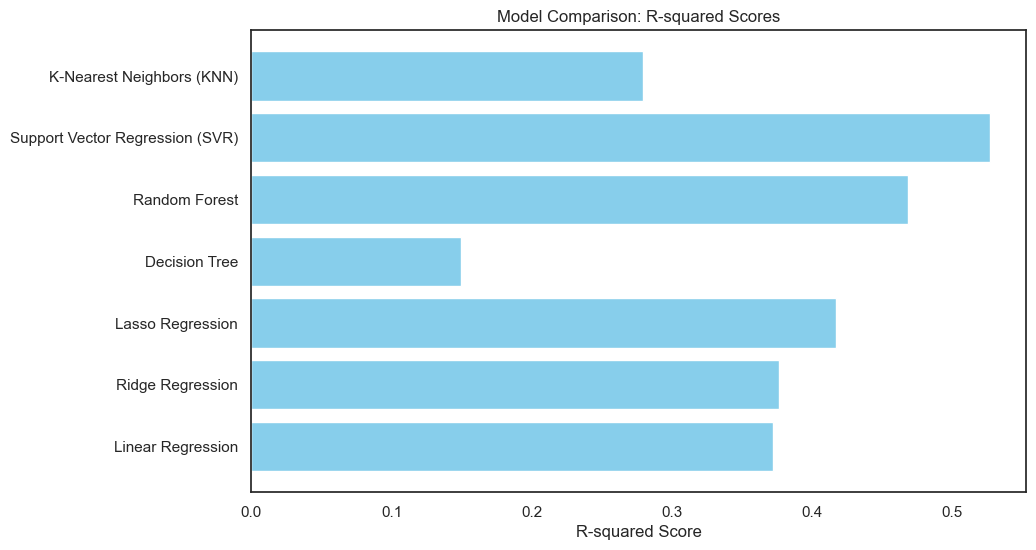

In [174]:
# Plotting model comparison
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model_name'], results_df['R2'], color="skyblue")
plt.xlabel("R-squared Score")
plt.title("Model Comparison: R-squared Scores")
plt.show()

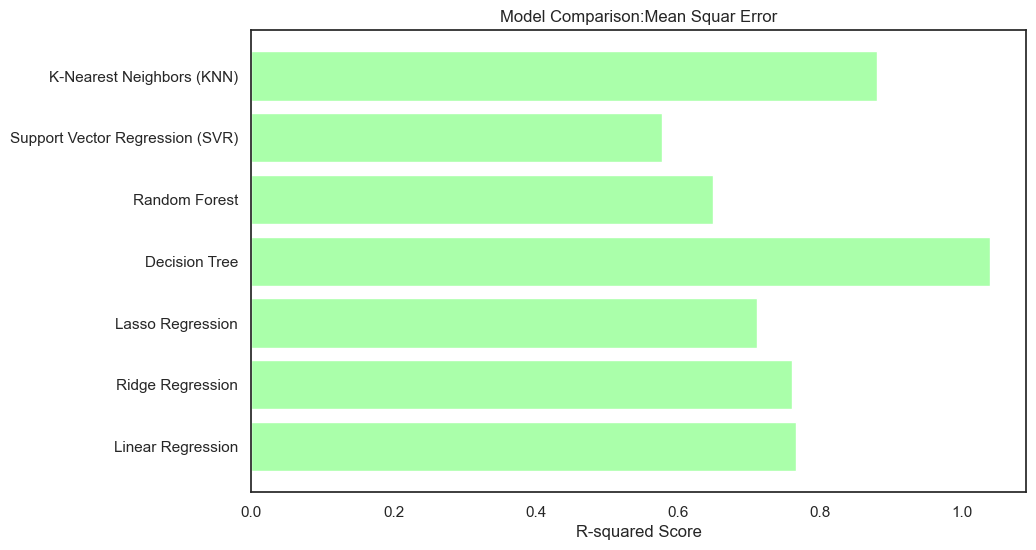

In [175]:
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model_name'], results_df['mse'], color="#aaffaa")
plt.xlabel("R-squared Score")
plt.title("Model Comparison:Mean Squar Error")
plt.show()

<Axes: xlabel='sex', ylabel='total_bill'>

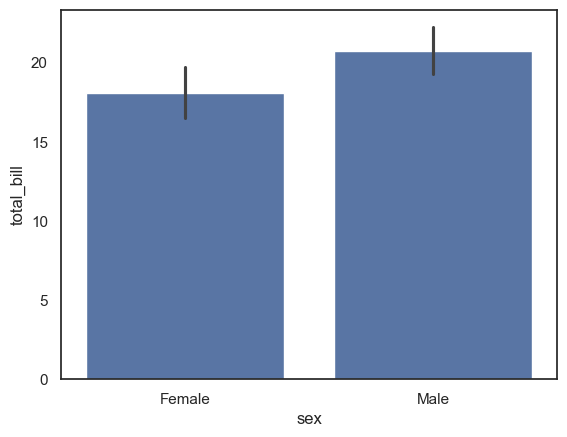

In [ ]:
# insights
sns.barplot(data=df, x='sex', y='total_bill')
#on an average male customer spend more

<Axes: xlabel='smoker', ylabel='total_bill'>

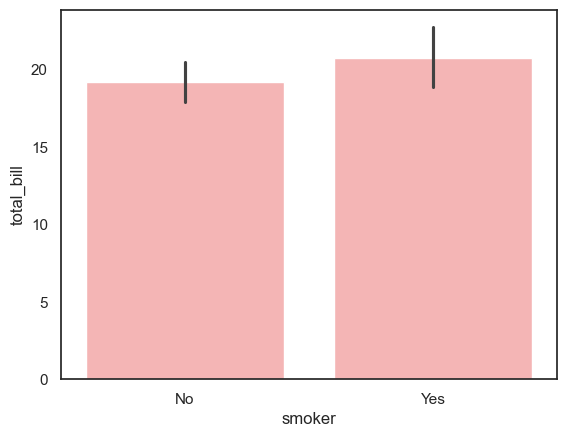

In [186]:
sns.barplot(data=df, x='smoker', y='total_bill',color='#ffaaaa')
# on an average smoker spend more

<Axes: xlabel='day', ylabel='total_bill'>

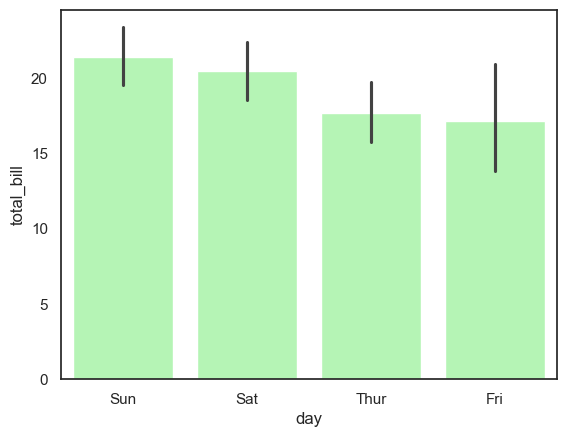

In [187]:
sns.barplot(data=df, x='day', y='total_bill',color='#aaffaa')
# on sun and sat more people come to restorant

<Axes: xlabel='size', ylabel='total_bill'>

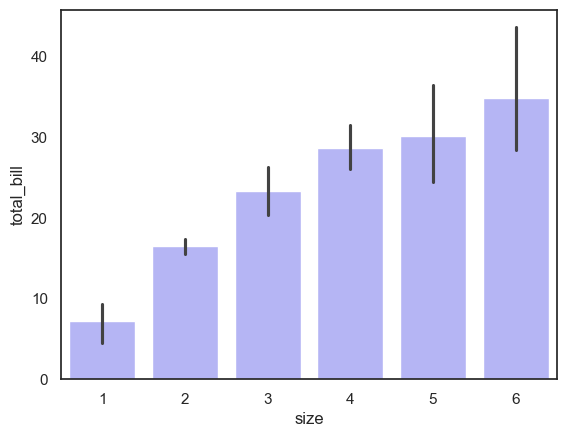

In [188]:
sns.barplot(data=df, x='size', y='total_bill',color='#aaaaff')
# as size increases from 1 to 2 bil almost get double but latter on increament is little

<Axes: xlabel='sex', ylabel='tip'>

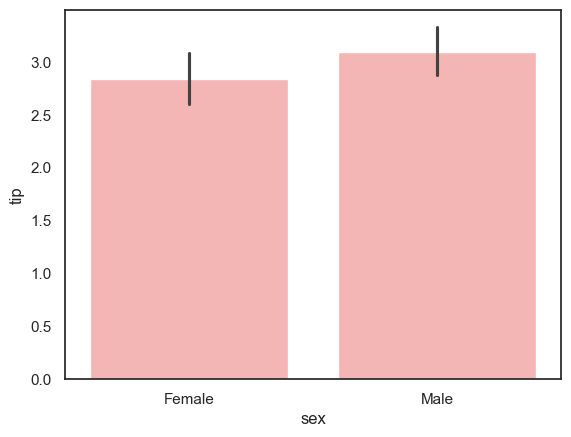

In [189]:
sns.barplot(data=df, x='sex', y='tip',color='#ffaaaa')
# male give more tip

<Axes: xlabel='smoker', ylabel='tip'>

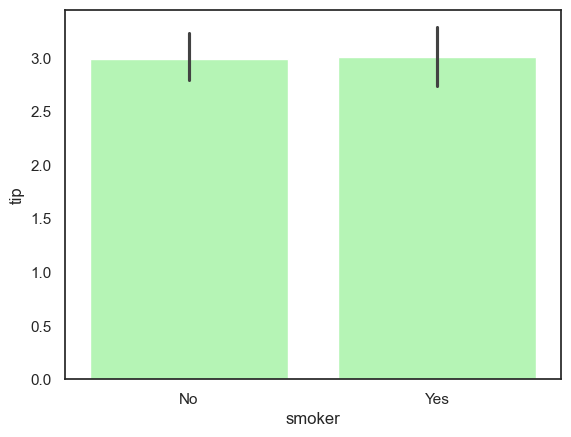

In [190]:
sns.barplot(data=df, x='smoker', y='tip',color='#aaffaa')
# smoker and non smoker give almost same tip

<Axes: xlabel='size', ylabel='tip'>

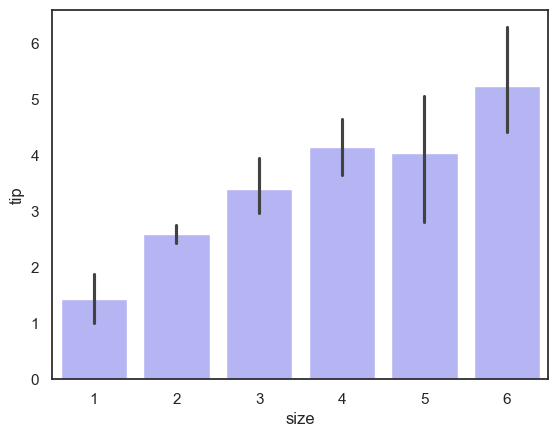

In [192]:
sns.barplot(data=df, x='size', y='tip',color='#aaaaff')
# as size increase tip also increases